In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
#Import Datasets
local_zip = '/content/Data/DataFix2.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
source_path = '/tmp/DataFix2'

source_path_Cendrawasih = os.path.join(source_path, 'Cendrawasih')
source_path_JalakBali = os.path.join(source_path, 'JalakBali')
source_path_GelatikJawa = os.path.join(source_path, 'GelatikJawa')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_Cendrawasih))} images of Cendrawasih.")
print(f"There are {len(os.listdir(source_path_JalakBali))} images of JalakBali.")
print(f"There are {len(os.listdir(source_path_GelatikJawa))} images of GelatikJawa.")

There are 100 images of Cendrawasih.
There are 100 images of JalakBali.
There are 100 images of GelatikJawa.


In [ ]:
root_dir = '/tmp/Data'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  training = os.path.join(root_path, "training")
  testing = os.path.join(root_path, "testing")

  Cendrawasih_training = os.path.join(training, "Cendrawasih")
  JalakBali_training = os.path.join(training, "JalakBali")
  GelatikJawa_training = os.path.join(training, "GelatikJawa")

  Cendrawasih_testing = os.path.join(testing, "Cendrawasih")
  JalakBali_testing = os.path.join(testing, "JalakBali") 
  GelatikJawa_testing = os.path.join(testing, "GelatikJawa")

  os.mkdir(root_path)
  os.mkdir(training)
  os.mkdir(testing)

  os.mkdir(Cendrawasih_training)
  os.mkdir(JalakBali_training)
  os.mkdir(GelatikJawa_training)

  os.mkdir(Cendrawasih_testing)
  os.mkdir(JalakBali_testing)
  os.mkdir(GelatikJawa_testing)

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/Data/training
/tmp/Data/testing
/tmp/Data/training/GelatikJawa
/tmp/Data/training/Cendrawasih
/tmp/Data/training/JalakBali
/tmp/Data/testing/GelatikJawa
/tmp/Data/testing/Cendrawasih
/tmp/Data/testing/JalakBali


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  data = os.listdir(SOURCE)

  data = random.sample(data, len(data))

  for count, file in enumerate(data):
        if(count <= SPLIT_SIZE * len(data)) and os.path.getsize(f"{SOURCE}/{file}")!=0:
            copyfile(f"{SOURCE}/{file}", f"{TRAINING}/{file}")
        elif (count >= SPLIT_SIZE * len(data)) and os.path.getsize(f"{SOURCE}/{file}")!=0:
            copyfile(f"{SOURCE}/{file}", f"{TESTING}/{file}")

In [ ]:
#Define paths
BC_SOURCE_DIR = "/tmp/DataFix2/Cendrawasih/"
GJ_SOURCE_DIR = "/tmp/DataFix2/GelatikJawa/"
JB_SOURCE_DIR = "/tmp/DataFix2/JalakBali/"

TRAINING_DIR = "/tmp/Data/training/"
TESTING_DIR = "/tmp/Data/testing/"

TRAINING_BC_DIR = os.path.join(TRAINING_DIR, "Cendrawasih/")
TESTING_BC_DIR = os.path.join(TESTING_DIR, "Cendrawasih/")

TRAINING_GJ_DIR = os.path.join(TRAINING_DIR, "GelatikJawa/")
TESTING_GJ_DIR = os.path.join(TESTING_DIR, "GelatikJawa/")

TRAINING_JB_DIR = os.path.join(TRAINING_DIR, "JalakBali/")
TESTING_JB_DIR = os.path.join(TESTING_DIR, "JalakBali/")


if len(os.listdir(TRAINING_BC_DIR)) > 0:
  for file in os.scandir(TRAINING_BC_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_GJ_DIR)) > 0:
  for file in os.scandir(TRAINING_GJ_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_JB_DIR)) > 0:
  for file in os.scandir(TRAINING_JB_DIR):
    os.remove(file.path)
# Define proportion of images used for training
split_size = .9

#Run the function
split_data(BC_SOURCE_DIR, TRAINING_BC_DIR, TESTING_BC_DIR, split_size)
split_data(GJ_SOURCE_DIR, TRAINING_GJ_DIR, TESTING_GJ_DIR, split_size)
split_data(JB_SOURCE_DIR, TRAINING_JB_DIR, TESTING_JB_DIR, split_size)

In [ ]:
#Check that the number of images matches the expected output
print(f"There are {len(os.listdir(TRAINING_BC_DIR))} images of cendrawasih for training")
print(f"There are {len(os.listdir(TRAINING_GJ_DIR))} images of Gelatik Jawa for training")
print(f"There are {len(os.listdir(TRAINING_JB_DIR))} images of Jalak Bali for training")
print(f"There are {len(os.listdir(TESTING_BC_DIR))} images of cendrawasih for testing")
print(f"There are {len(os.listdir(TESTING_GJ_DIR))} images of Gelatik Jawa for testing")
print(f"There are {len(os.listdir(TESTING_JB_DIR))} images of Jalak Bali for testing")

There are 91 images of cendrawasih for training
There are 91 images of Gelatik Jawa for training
There are 91 images of Jalak Bali for training
There are 9 images of cendrawasih for testing
There are 9 images of Gelatik Jawa for testing
There are 9 images of Jalak Bali for testing


In [ ]:
train_bc_fnames = os.listdir(TRAINING_BC_DIR)
train_gj_fnames = os.listdir(TRAINING_GJ_DIR)
train_jb_fnames = os.listdir(TRAINING_JB_DIR)

print(train_bc_fnames[:5])
print(train_gj_fnames[:5])
print(train_jb_fnames[:5])

['BC (10) - Salin.jpg', 'BC (34).jpg', 'BC (45).jpg', 'BC (3) - Salin.jpg', 'BC (23).jpg']
['GJ 23.jpg', 'GJ 55.jpg', 'GJ 51.jpg', 'GJ 91.jpg', 'GJ 12.jpg']
['049.jpg', '021.jpg', '054.jpg', '003.jpg', '079.jpg']


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Parameters for our graph
nrows = 4
ncols = 4

pic_index = 0 

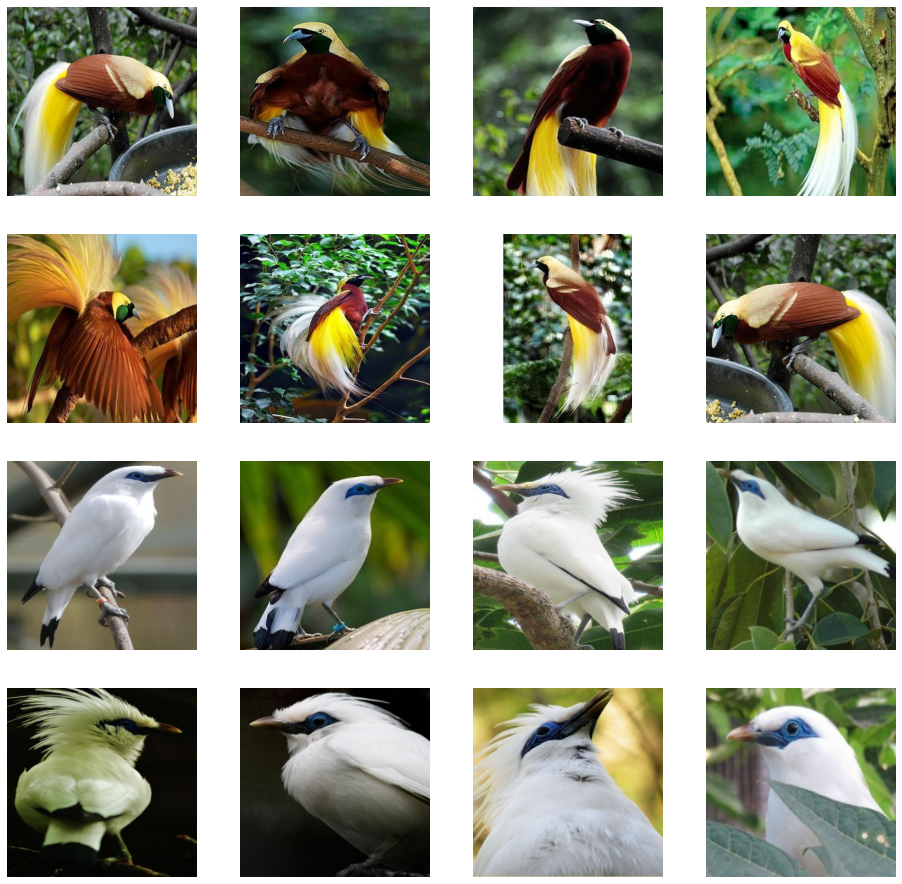

In [ ]:
#Show Picture Sample
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_bc_pix = [os.path.join(TRAINING_BC_DIR, fname) 
                for fname in train_bc_fnames[ pic_index-8:pic_index] 
               ]

next_ou_pix = [os.path.join(TRAINING_JB_DIR, fname) 
                for fname in train_jb_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_bc_pix+next_ou_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
class_names = ['Cendrawasih', 'Jalak Bali', 'Gelatik Jawa']

In [ ]:
#Create a labels.txt file with the class names
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
def format_example(image, label):
    image = tf.cast(x=image, dtype = tf.float32)
        
    # Normalize the image in the range [0, 1]
    image = image * 1.0/255.0
    
    return image, label

In [ ]:
# Data Preprocessing
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1.0/255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  
  return train_generator, validation_generator

In [ ]:
#Test Generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 273 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


In [ ]:
IMG_SHAPE = (224, 224, 3)
#Create base model from pre-trained model VGG-16Net
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [ ]:
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#Create model
model = tf.keras.Sequential([
    base_model,    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile("adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          147488    
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 global_average_pooling2d_1   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 14,862,275
Trainable params: 147,587
Non-trainable params: 14,714,688
____________________________________

In [ ]:
#Training model
history = model.fit_generator(train_generator, 
                    epochs = 100, 
                    validation_data = validation_generator)

In [ ]:
# Testing model
model.evaluate(validation_generator)

3/3 [==============================] - 13s 4s/step - loss: 0.0729 - acc: 0.9630


[0.07291237264871597, 0.9629629850387573]

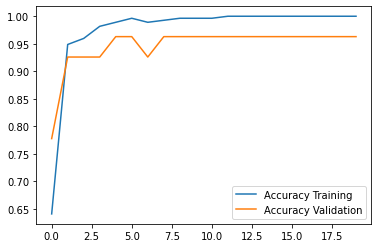

In [ ]:
plt.plot(history.history["acc"],label="Accuracy Training")
plt.plot(history.history["val_acc"],label="Accuracy Validation")
plt.legend()
plt.show()

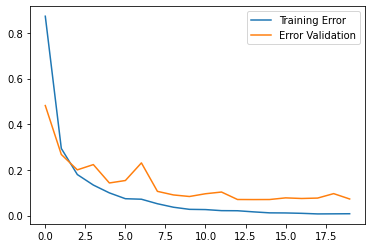

In [ ]:
plt.plot(history.history["loss"],label="Training Error")
plt.plot(history.history["val_loss"],label="Error Validation")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile, os

Saving BC (1).jpg to BC (1).jpg
BC (1).jpg
Cendrawasih


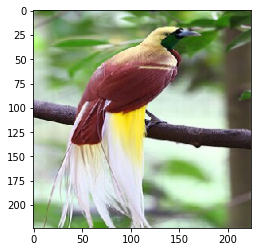

In [ ]:
uploaded = files.upload()

for name in uploaded.keys():
  img = image.load_img(name, target_size=(224,224))
  image_plot = plt.imshow(img)
  image_arr = image.img_to_array(img)
  image_arr = np.expand_dims(image_arr, axis=0)

  images = np.vstack([image_arr]) 
  pred = model.predict(images, batch_size = 10)

  print(name)
  if pred[0][0]==1:
    print("Cendrawasih")
  elif pred[0][1]==1:
    print("Jalak Bali")
  else:
    print("Gelatik Jawa")

In [ ]:
#Convert to Tensorflow Lite
saved_model_dir = 'save/model'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('Bismillah_Capstone_Project_fix(2).tflite', 'wb') as f:
  f.write(tflite_model)